In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 15 15:27:26 2020

@author: Parth
"""

# =============================================================================
# --> Kernels are used in SVM if the data cannot be linearly separated. The kernels simulate the 
#     mapping of the data from 2D to higher planes in order to create a decision boundary and classify
#     the datapoints by separation. The higher planes are remapped to the original lower plane.
#     
# --> Most commonly used kernels are: RBF, Gaussian and Polynomial kernels. We will be using RBF kernel 
#     in this code. 
# 
# --> The formula for RBF kernel is: k=exp(||x-l||^2/(2s))
#     Where: x= The current datapoint.
#            l= The landmark(center of the graph). 
#            s= Sigma; specifies the size of the decision boundary. 
# 
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score



df0=pd.read_csv('Social_Network_Ads.csv')

df2=pd.get_dummies(df0['Gender'])

result = pd.concat([df0,df2],axis=1)
df=result.drop(['User ID','Gender'],axis=1)

y=df.iloc[:,2].values
df0=df.drop(['Purchased'],axis=1)


X=df0.iloc[:,[0,1]].values



X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


print(df.head())

   Age  EstimatedSalary  Purchased  Female  Male
0   19            19000          0       0     1
1   35            20000          0       0     1
2   26            43000          0       1     0
3   27            57000          0       1     0
4   19            76000          0       0     1


In [2]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
fscore=f1_score(y_test,y_pred)
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

print('Precision: {}'.format(precision))
print('Recall/Sensitivity: {}'.format(recall))
print('F1 score: {}'.format(fscore))
print('Specificity: {}'.format(specificity))

from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
print("Mean of accuracies:",accuracies.mean())
print("STD of accuracies:",accuracies.std())



Precision: 0.8620689655172413
Recall/Sensitivity: 0.8620689655172413
F1 score: 0.8620689655172413
Specificity: 0.9215686274509803
Mean of accuracies: 0.90625
STD of accuracies: 0.03952847075210474


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


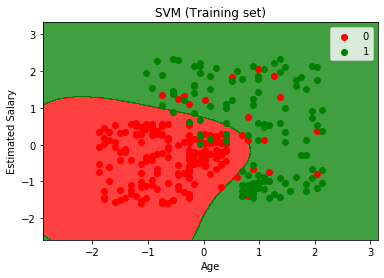

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


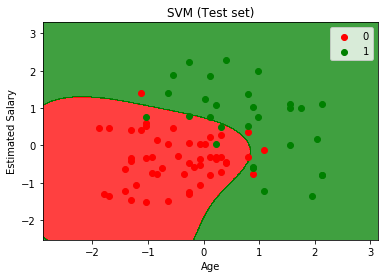

In [3]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()





from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
